In [3]:
#Import the packages you will use
import pandas as pd
import numpy as np
import statsmodels.api as sm
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from pyogrio import set_gdal_config_options
import geopandas as gpd
import warnings
import datetime as dt 
import plotly.express as px
import plotly.graph_objects as go
import folium
import colorama
import xgboost as xgb

pd.options.display.max_columns=100
plt.style.use('https://raw.githubusercontent.com/dhaitz/matplotlib-stylesheets/master/pitayasmoothie-dark.mplstyle')


/var/folders/6s/bfbnxg_x46gfcltpcwwr67200000gn/T/ipykernel_24868/2669215595.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# **Linear Regression**

In [2]:
#Import the data
df = pd.read_csv('NY-House-Dataset.csv', sep=',')
df

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.000000,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.000000,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.000000,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.000000,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.000000,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4796,Brokered by COMPASS,Co-op for sale,599000,1,1.000000,2184.207862,222 E 80th St Apt 3A,"Manhattan, NY 10075","222 E 80th St Apt 3AManhattan, NY 10075",New York,New York County,New York,Manhattan,222,"222 E 80th St #3a, New York, NY 10075, USA",40.774350,-73.955879
4797,Brokered by Mjr Real Estate Llc,Co-op for sale,245000,1,1.000000,2184.207862,97-40 62 Dr Unit Lg,"Rego Park, NY 11374","97-40 62 Dr Unit LgRego Park, NY 11374",United States,New York,Queens County,Queens,62nd Drive,"97-40 62nd Dr, Rego Park, NY 11374, USA",40.732538,-73.860152
4798,Brokered by Douglas Elliman - 575 Madison Ave,Co-op for sale,1275000,1,1.000000,2184.207862,427 W 21st St Unit Garden,"New York, NY 10011","427 W 21st St Unit GardenNew York, NY 10011",United States,New York,New York County,New York,West 21st Street,"427 W 21st St, New York, NY 10011, USA",40.745882,-74.003398
4799,Brokered by E Realty International Corp,Condo for sale,598125,2,1.000000,655.000000,91-23 Corona Ave Unit 4G,"Elmhurst, NY 11373","91-23 Corona Ave Unit 4GElmhurst, NY 11373",New York,Queens County,Queens,Flushing,91-23,"91-23 Corona Ave. #4b, Flushing, NY 11373, USA",40.742770,-73.872752


In [3]:
np.sum(df.isnull(),axis = 0) # No null

BROKERTITLE                    0
TYPE                           0
PRICE                          0
BEDS                           0
BATH                           0
PROPERTYSQFT                   0
ADDRESS                        0
STATE                          0
MAIN_ADDRESS                   0
ADMINISTRATIVE_AREA_LEVEL_2    0
LOCALITY                       0
SUBLOCALITY                    0
STREET_NAME                    0
LONG_NAME                      0
FORMATTED_ADDRESS              0
LATITUDE                       0
LONGITUDE                      0
dtype: int64

In [4]:
df.drop(columns = ['BROKERTITLE','ADDRESS','MAIN_ADDRESS','STREET_NAME','LONG_NAME','FORMATTED_ADDRESS'],inplace = True) # drop unusable (for now) features

In [5]:
features_to_encode = ['TYPE', 'STATE', 'ADMINISTRATIVE_AREA_LEVEL_2', 'LOCALITY','SUBLOCALITY']
for x in features_to_encode:
    one_hot = pd.get_dummies(df[x],drop_first=True,dtype=int)
    df.drop(columns = x, inplace = True)
    df = pd.concat([df, one_hot], axis=1)

In [6]:
df.describe()

,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE,Coming Soon,Condo for sale,Condop for sale,Contingent,For sale,Foreclosure,House for sale,Land for sale,Mobile house for sale,Multi-family home for sale,Pending,Townhouse for sale,"Astoria, NY 11101","Astoria, NY 11102","Astoria, NY 11103","Astoria, NY 11105","Astoria, NY 11106","Bayside, NY 11360","Bayside, NY 11361","Bayside, NY 11364","Bedford Stuyvesant, NY 11206","Bedford Stuyvesant, NY 11216","Bedford Stuyvesant, NY 11221","Bedford Stuyvesant, NY 11233","Beechhurst, NY 11357","Belle Harbor, NY 11694","Bellerose, NY 11426","Briarwood, NY 11435","Brighton Beach, NY 11235","Bronx Ny, NY 10458","Bronx, NY 10451","Bronx, NY 10452","Bronx, NY 10453","Bronx, NY 10454","Bronx, NY 10455","Bronx, NY 10456","Bronx, NY 10457","Bronx, NY 10458","Bronx, NY 10459","Bronx, NY 10460","Bronx, NY 10461","Bronx, NY 10462","Bronx, NY 10463","Bronx, NY 10464",...,10312,10463,10465,10466,10471,11214,11218,11229,11234,11237,11412,11414,11417,Bronx County,Brooklyn,Kings County,New York,New York County,Queens County,United States,Brooklyn,Flatbush,Kings County,New York,New York County,Queens,Queens County,Richmond County,The Bronx,United States,Brooklyn,Brooklyn Heights,Coney Island,Dumbo,East Bronx,Flushing,Fort Hamilton,Jackson Heights,Kings County,Manhattan,New York,New York County,Queens,Queens County,Rego Park,Richmond County,Riverdale,Snyder Avenue,Staten Island,The Bronx
count,4.801000e+03,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000,...,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000
mean,2.356940e+06,3.356801,2.373861,2184.207862,40.714227,-73.941601,0.000417,0.185586,0.001041,0.018330,0.004166,0.002916,0.210789,0.010206,0.000208,0.151427,0.050614,0.062279,0.000417,0.000208,0.001458,0.003958,0.001041,0.010831,0.005207,0.000208,0.000208,0.000417,0.000208,0.000417,0.001041,0.000208,0.002291,0.000833,0.000208,0.000208,0.002499,0.001666,0.001666,0.000833,0.000208,0.002291,0.002499,0.003541,0.001250,0.002499,0.006249,0.007915,0.016455,0.001250,...,0.000208,0.000208,0.000208,0.000208,0.000417,0.001666,0.000208,0.000625,0.000208,0.000208,0.000208,0.000208,0.000208,0.001041,0.000208,0.001250,0.466778,0.004374,0.001250,0.517392,0.001250,0.000208,0.096647,0.521766,0.203916,0.001250,0.116017,0.012289,0.001041,0.007707,0.096647,0.000208,0.000625,0.000208,0.000208,0.000833,0.000208,0.000208,0.151427,0.004374,0.211623,0.059571,0.115601,0.142470,0.000208,0.099979,0.000833,0.000208,0.012289,0.038325
std,3.135525e+07,2.602315,1.946962,2377.140894,0.087676,0.101082,0.020408,0.388813,0.032258,0.134154,0.064415,0.053927,0.407912,0.100519,0.014432,0.358502,0.219232,0.241686,0.020408,0.014432,0.038160,0.062791,0.032258,0.103518,0.071981,0.014432,0.014432,0.020408,0.014432,0.020408,0.032258,0.014432,0.047816,0.028855,0.014432,0.014432,0.049937,0.040791,0.040791,0.028855,0.014432,0.047816,0.049937,0.059406,0.035333,0.049937,0.078810,0.0886

In [7]:
X = df.drop(columns = 'PRICE')
y = df['PRICE']

In [8]:
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Create a linear regression model
model = LinearRegression()

X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

model = sm.OLS(y_train, X_train)
result = model.fit()
print(result.summary())

best_coefficients = result.params
print(best_coefficients)

summary = result.summary()
top_10_coef = summary.tables[1].data[1:11]


                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     782.9
Date:                Wed, 13 Mar 2024   Prob (F-statistic):               0.00
Time:                        18:11:16   Log-Likelihood:                -55825.
No. Observations:                3360   AIC:                         1.123e+05
Df Residuals:                    3022   BIC:                         1.144e+05
Df Model:                         337                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In [9]:
summary_data = result.summary().tables[1].data[1:11]
top_10_coefficients = [row[1] for row in summary_data]
top_10_standard_errors = [row[2] for row in summary_data]
top_10_t_values = [row[3] for row in summary_data]
top_10_p_values = [row[4] for row in summary_data]

print("Top 10 Coefficients:")
print(top_10_coefficients)
print("Top 10 Standard Errors:")
print(top_10_standard_errors)
print("Top 10 T-values:")
print(top_10_t_values)
print("Top 10 P-values:")
print(top_10_p_values)


Top 10 Coefficients:
['-1.145e+09', '-1.514e+05', ' 3.828e+05', '  708.8894', ' 1.606e+07', '-1.148e+07', '-8.514e+05', ' 1.225e+06', '  2.75e+05', '  3.87e+05']
Top 10 Standard Errors:
['  7.1e+08', ' 5.44e+04', ' 7.05e+04', '   46.056', ' 1.25e+07', ' 1.02e+07', ' 4.34e+06', ' 2.48e+05', '  3.1e+06', ' 6.21e+05']
Top 10 T-values:
['   -1.613', '   -2.785', '    5.429', '   15.392', '    1.286', '   -1.123', '   -0.196', '    4.934', '    0.089', '    0.623']
Top 10 P-values:
[' 0.107', ' 0.005', ' 0.000', ' 0.000', ' 0.199', ' 0.262', ' 0.844', ' 0.000', ' 0.929', ' 0.533']


# **K-Means**

In [18]:
df = pd.read_csv('NY-House-Dataset.csv', sep=',')
df

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.000000,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.000000,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.000000,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.000000,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.000000,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4796,Brokered by COMPASS,Co-op for sale,599000,1,1.000000,2184.207862,222 E 80th St Apt 3A,"Manhattan, NY 10075","222 E 80th St Apt 3AManhattan, NY 10075",New York,New York County,New York,Manhattan,222,"222 E 80th St #3a, New York, NY 10075, USA",40.774350,-73.955879
4797,Brokered by Mjr Real Estate Llc,Co-op for sale,245000,1,1.000000,2184.207862,97-40 62 Dr Unit Lg,"Rego Park, NY 11374","97-40 62 Dr Unit LgRego Park, NY 11374",United States,New York,Queens County,Queens,62nd Drive,"97-40 62nd Dr, Rego Park, NY 11374, USA",40.732538,-73.860152
4798,Brokered by Douglas Elliman - 575 Madison Ave,Co-op for sale,1275000,1,1.000000,2184.207862,427 W 21st St Unit Garden,"New York, NY 10011","427 W 21st St Unit GardenNew York, NY 10011",United States,New York,New York County,New York,West 21st Street,"427 W 21st St, New York, NY 10011, USA",40.745882,-74.003398
4799,Brokered by E Realty International Corp,Condo for sale,598125,2,1.000000,655.000000,91-23 Corona Ave Unit 4G,"Elmhurst, NY 11373","91-23 Corona Ave Unit 4GElmhurst, NY 11373",New York,Queens County,Queens,Flushing,91-23,"91-23 Corona Ave. #4b, Flushing, NY 11373, USA",40.742770,-73.872752


/var/folders/6s/bfbnxg_x46gfcltpcwwr67200000gn/T/ipykernel_24868/354966322.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_clustering.fillna(X_clustering.mean(), inplace=True)  # Handling missing values


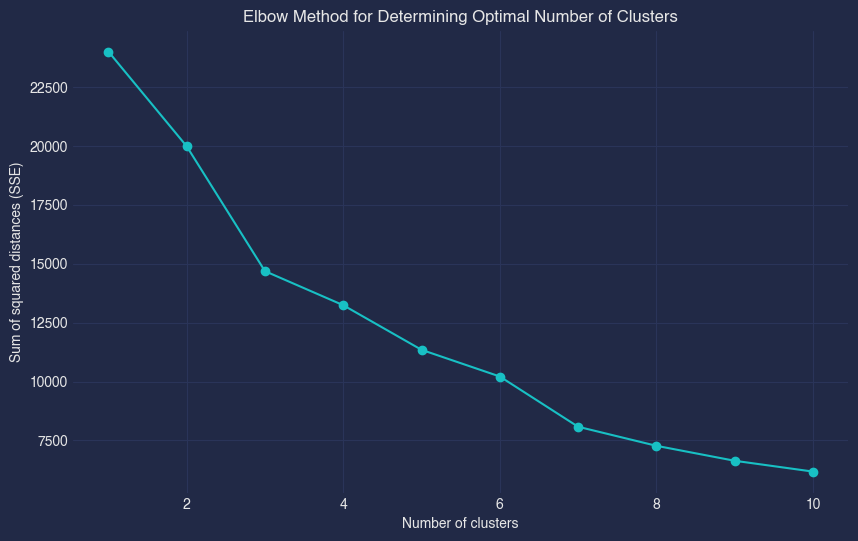

In [19]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Selecting features for K-means clustering
X_clustering = df[['BEDS', 'BATH', 'PROPERTYSQFT', 'LATITUDE', 'LONGITUDE']]
X_clustering.fillna(X_clustering.mean(), inplace=True)  # Handling missing values

# Scaling the features
scaler_clustering = StandardScaler()
X_scaled_clustering = scaler_clustering.fit_transform(X_clustering)

# Using the Elbow Method to find the optimal number of clusters
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled_clustering)
    sse.append(kmeans.inertia_)

# Plotting the Elbow Method results
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method for Determining Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances (SSE)')
plt.grid(True)
plt.show()

# **SVM**

In [14]:
df = pd.read_csv('NY-House-Dataset.csv')
df.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


In [15]:
# Selecting features and target variable
features = ['BEDS', 'BATH', 'PROPERTYSQFT', 'LATITUDE', 'LONGITUDE']
X = df[features]
y = df['PRICE']

# Handling missing values if any
X.fillna(X.mean(), inplace=True)

# Scaling features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

/var/folders/6s/bfbnxg_x46gfcltpcwwr67200000gn/T/ipykernel_24868/4231407404.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)


In [17]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np

# Define the parameter grid
param_grid_svm = {
    'C':[0.01, 0.1, 1],
    'gamma': [0.1, 0.25, 0.5, 'scale', 'auto'], # 1/n_features
    'kernel': ['linear','rbf']
}

# Initialize GridSearchCV with SVR
grid_search_svm = GridSearchCV(SVC(), param_grid_svm, scoring='neg_mean_squared_error', cv=3, verbose=2, n_jobs=-1)

# Fit GridSearchCV to the training data
grid_search_svm.fit(X_train, y_train)

# Find the best parameters and model
best_params_svm = grid_search_svm.best_params_
best_svm_model = grid_search_svm.best_estimator_

# Predict and evaluate the best model
y_pred_best_svm = best_svm_model.predict(X_test)
rmse_best_svm = np.sqrt(mean_squared_error(y_test, y_pred_best_svm))

print("Best Parameters:", best_params_svm)
print("Best Model RMSE:", rmse_best_svm)


Fitting 3 folds for each of 30 candidates, totalling 90 fits


/Users/jakebrulato/Documents/GitHub/Advanced_BA/.venv/lib/python3.10/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


[CV] END ...................C=0.01, gamma=0.1, kernel=linear; total time=  39.8s
[CV] END ..................C=0.01, gamma=0.25, kernel=linear; total time=  39.9s
[CV] END ...................C=0.01, gamma=0.1, kernel=linear; total time=  39.9s
[CV] END ...................C=0.01, gamma=0.1, kernel=linear; total time=  40.0s
[CV] END ..................C=0.01, gamma=0.25, kernel=linear; total time=  40.1s
[CV] END ..................C=0.01, gamma=0.25, kernel=linear; total time=  40.2s
[CV] END ......................C=0.01, gamma=0.1, kernel=rbf; total time=  40.9s
[CV] END .....................C=0.01, gamma=0.25, kernel=rbf; total time=  41.1s
[CV] END ......................C=0.01, gamma=0.1, kernel=rbf; total time=  41.2s
[CV] END .....................C=0.01, gamma=0.25, kernel=rbf; total time=  41.1s
[CV] END ......................C=0.01, gamma=0.1, kernel=rbf; total time=  41.2s
[CV] END .....................C=0.01, gamma=0.25, kernel=rbf; total time=  41.2s
[CV] END ...................

# **KNN**

In [10]:
df = pd.read_csv('NY-House-Dataset.csv')
df.head()


,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


In [11]:
df = df[['PRICE','BEDS','BATH','STREET_NAME','PROPERTYSQFT','TYPE']]
df.head(5)

,PRICE,BEDS,BATH,STREET_NAME,PROPERTYSQFT,TYPE
0,315000,2,2.000000,East 55th Street,1400.0,Condo for sale
1,195000000,7,10.000000,New York,17545.0,Condo for sale
2,260000,4,2.000000,Staten Island,2015.0,House for sale
3,69000,3,1.000000,New York,445.0,Condo for sale
4,55000000,7,2.373861,New York,14175.0,Townhouse for sale


In [12]:
df.info()
np.sum(df.isnull(),axis = 0) # No null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PRICE         4801 non-null   int64  
 1   BEDS          4801 non-null   int64  
 2   BATH          4801 non-null   float64
 3   STREET_NAME   4801 non-null   object 
 4   PROPERTYSQFT  4801 non-null   float64
 5   TYPE          4801 non-null   object 
dtypes: float64(2), int64(2), object(2)
memory usage: 225.2+ KB


PRICE           0
BEDS            0
BATH            0
STREET_NAME     0
PROPERTYSQFT    0
TYPE            0
dtype: int64

In [13]:
df.columns = ['price','beds','bath','street','property','type']
df = pd.get_dummies(df, columns=['type'], drop_first=True, dtype=int)
df_price = df.drop('street',axis=1)
df_price

,price,beds,bath,property,type_Coming Soon,type_Condo for sale,type_Condop for sale,type_Contingent,type_For sale,type_Foreclosure,type_House for sale,type_Land for sale,type_Mobile house for sale,type_Multi-family home for sale,type_Pending,type_Townhouse for sale
0,315000,2,2.000000,1400.000000,0,1,0,0,0,0,0,0,0,0,0,0
1,195000000,7,10.000000,17545.000000,0,1,0,0,0,0,0,0,0,0,0,0
2,260000,4,2.000000,2015.000000,0,0,0,0,0,0,1,0,0,0,0,0
3,69000,3,1.000000,445.000000,0,1,0,0,0,0,0,0,0,0,0,0
4,55000000,7,2.373861,14175.000000,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4796,599000,1,1.000000,2184.207862,0,0,0,0,0,0,0,0,0,0,0,0
4797,245000,1,1.000000,2184.207862,0,0,0,0,0,0,0,0,0,0,0,0
4798,1275000,1,1.000000,2184.207862,0,0,0,0,0,0,0,0,0,0,0,0
4799,598125,2,1.000000,655.000000,0,1,0,0,0,0,0,0,0,0,0,0


In [14]:
df_price.corr()

,price,beds,bath,property,type_Coming Soon,type_Condo for sale,type_Condop for sale,type_Contingent,type_For sale,type_Foreclosure,type_House for sale,type_Land for sale,type_Mobile house for sale,type_Multi-family home for sale,type_Pending,type_Townhouse for sale
price,1.000000,0.052189,0.079371,1.108888e-01,-0.000772,0.004168,-1.398907e-03,-0.006426,-0.000830,-0.001749,0.021879,-0.004158,-4.921164e-04,-0.009115,-0.007483,0.032954
beds,0.052189,1.000000,0.776447,4.205033e-01,0.008969,-0.187969,-1.683631e-02,-0.007399,-0.002655,0.016337,0.075740,-0.013924,1.466205e-02,0.466629,-0.015229,0.165064
bath,0.079371,0.776447,1.000000,4.839351e-01,0.001323,-0.089650,-1.946928e-02,-0.013681,-0.008478,0.010940,0.043033,-0.000398,4.642352e-03,0.337245,-0.015312,0.196313
property,0.110889,0.420503,0.483935,1.000000e+00,0.000283,-0.122426,3.282118e-12,-0.023512,-0.001843,0.003345,0.015513,-0.001076,1.467270e-12,0.191174,-0.011078,0.185071
type_Coming Soon,-0.000772,0.008969,0.001323,2.825361e-04,1.000000,-0.009745,-6.591512e-04,-0.002790,-0.001320,-0.001104,-0.010550,-0.002073,-2.946585e-04,-0.008624,-0.004714,-0.005261
type_Condo for sale,0.004168,-0.187969,-0.089650,-1.224260e-01,-0.009745,1.000000,-1.541331e-02,-0.065229,-0.030875,-0.025816,-0.246705,-0.048474,-6.890169e-03,-0.201654,-0.110222,-0.123022
type_Condop for sale,-0.001399,-0.016836,-0.019469,3.282118e-12,-0.000659,-0.015413,1.000000e+00,-0.004412,-0.002088,-0.001746,-0.016687,-0.003279,-4.660417e-04,-0.013640,-0.007455,-0.008321
type_Contingent,-0.006426,-0.007399,-0.013681,-2.351201e-02,-0.002790,-0.065229,-4.412026e-03,1.000000,-0.008838,-0.007390,-0.070619,-0.013876,-1.972296e-03,-0.057723,-0.031551,-0.035215
type_For sale,-0.000830,-0.002655,-0.008478,-1.842863e-03,-0.001320,-0.030875,-2.088339e-03,-0.008838,1.000000,-0.003498,-0.033426,-0.006568,-9.335445e-04,-0.027322,-0.014934,-0.016668
type_Foreclosure,-0.001749,0.016337,0.010940,3.345051e-03,-0.001104,-0.025816,-1.746135e-03,-0.007390,-0.003498,1.000000,-0.027949,-0.005492,-7.805697e-04,-0.022845,-0.012487,-0.013937


In [15]:
X = df_price.drop('price',axis=1)
y = df_price['price']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

neighbors = np.arange(1,11)
train_accuracy = np.zeros(len(neighbors))
test_accuracy = np.zeros(len(neighbors))

In [17]:
# Import the necessary module
from sklearn.preprocessing import StandardScaler

# Create an instance of the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the training data
X_train_scaled = scaler.fit_transform(X_train)

# Apply the scaler to the test data
X_test_scaled = scaler.transform(X_test)

In [18]:
for i,k in enumerate(neighbors):

    # Instantiate classifiers
    knn = KNeighborsClassifier(n_neighbors=k)

    #Fit the model
    knn.fit(X_train, y_train)

    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test)

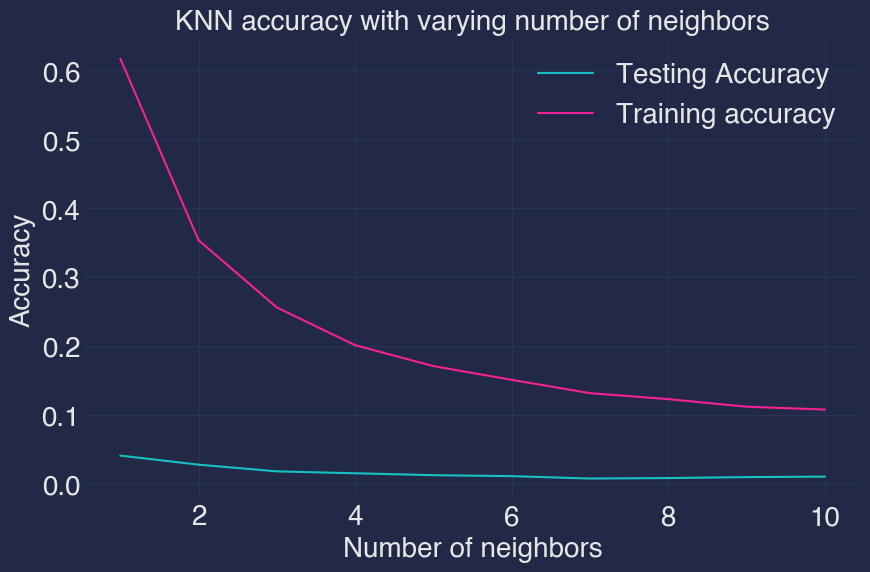

In [19]:
# Plot accuracy per k
plt.figure(figsize=(10,6))
plt.title('KNN accuracy with varying number of neighbors',fontsize=20)
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend(prop={'size': 20})
plt.xlabel('Number of neighbors',fontsize=20)
plt.ylabel('Accuracy',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

# **RF**

In [4]:
df = pd.read_csv('NY-House-Dataset.csv')
df.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.metrics import accuracy_score

# Selecting features and target variable
features = ['BEDS', 'BATH', 'PROPERTYSQFT', 'LATITUDE', 'LONGITUDE']
X = df[features]
y = df['PRICE']

# Handling missing values if any
X.fillna(X.mean(), inplace=True)

# Scaling features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initializing and fitting the Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Making predictions
y_pred = rf.predict(X_test)

# Calculating the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Making predictions
y_pred = rf.predict(X_test)

# Calculating the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

rmse


/var/folders/6s/bfbnxg_x46gfcltpcwwr67200000gn/T/ipykernel_24868/360714742.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)


5347476.644247078

In [11]:
# Adjusting the Random Forest model's hyperparameters
rf_tweaked = RandomForestRegressor(n_estimators=200, max_depth=20, min_samples_split=10, random_state=42)
rf_tweaked.fit(X_train, y_train)

# Making predictions with the tweaked model
y_pred_tweaked = rf_tweaked.predict(X_test)

# Calculating the new RMSE
mse_tweaked = mean_squared_error(y_test, y_pred_tweaked)
rmse_tweaked = np.sqrt(mse_tweaked)

rmse_tweaked

4745506.177601577

In [13]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500, 600],  # Number of trees in the forest
    'max_depth': [5, 10, 20, 30, 40 ,50],  # Maximum depth of the tree
    'min_samples_split': [2, 10, 20]  # Minimum number of samples required to split an internal node
}

# Initialize the Grid Search model
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           scoring='neg_mean_squared_error',
                           cv=3,  # Number of folds in cross-validation
                           verbose=2,
                           n_jobs=-1)  # Use all processors

# Fit the Grid Search to the data
grid_search.fit(X_train, y_train)

# Extract the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Predict using the best model
y_pred_optimized = best_model.predict(X_test)

# Calculate RMSE of the optimized model
mse_optimized = mean_squared_error(y_test, y_pred_optimized)
rmse_optimized = np.sqrt(mse_optimized)

print(f"Optimized RMSE: {rmse_optimized}")
print(f"Best Parameters: {best_params}")


Fitting 3 folds for each of 108 candidates, totalling 324 fits
[CV] END .max_depth=5, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END .max_depth=5, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END .max_depth=5, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END .max_depth=5, min_samples_split=2, n_estimators=200; total time=   0.9s
[CV] END .max_depth=5, min_samples_split=2, n_estimators=200; total time=   0.9s
[CV] END .max_depth=5, min_samples_split=2, n_estimators=200; total time=   0.9s
[CV] END .max_depth=5, min_samples_split=2, n_estimators=300; total time=   1.5s
[CV] END .max_depth=5, min_samples_split=2, n_estimators=300; total time=   1.5s
[CV] END .max_depth=5, min_samples_split=2, n_estimators=300; total time=   1.5s
[CV] END max_depth=5, min_samples_split=10, n_estimators=100; total time=   0.5s
[CV] END max_depth=5, min_samples_split=10, n_estimators=100; total time=   0.5s
[CV] END .max_depth=5, min_samples_split=2, n_

# **EDA**

In [ ]:
rc = {
    "axes.facecolor": "#F8F8F8",
    "figure.facecolor": "#F8F8F8",
    "axes.edgecolor": "#000000",
    "grid.color": "#EBEBE7" + "30",
    "font.family": "serif",
    "axes.labelcolor": "#000000",
    "xtick.color": "#000000",
    "ytick.color": "#000000",
    "grid.alpha": 0.4,
}

sns.set(rc=rc)
palette = ['#302c36', '#037d97', '#E4591E', '#C09741',
           '#EC5B6D', '#90A6B1', '#6ca957', '#D8E3E2']

from colorama import Style, Fore
blk = Style.BRIGHT + Fore.BLACK
mgt = Style.BRIGHT + Fore.MAGENTA
red = Style.BRIGHT + Fore.RED
blu = Style.BRIGHT + Fore.BLUE
res = Style.RESET_ALL

plt.style.use('seaborn-v0_8-pastel')

In [ ]:
df = pd.read_csv('NY-House-Dataset.csv')
df.head()


,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


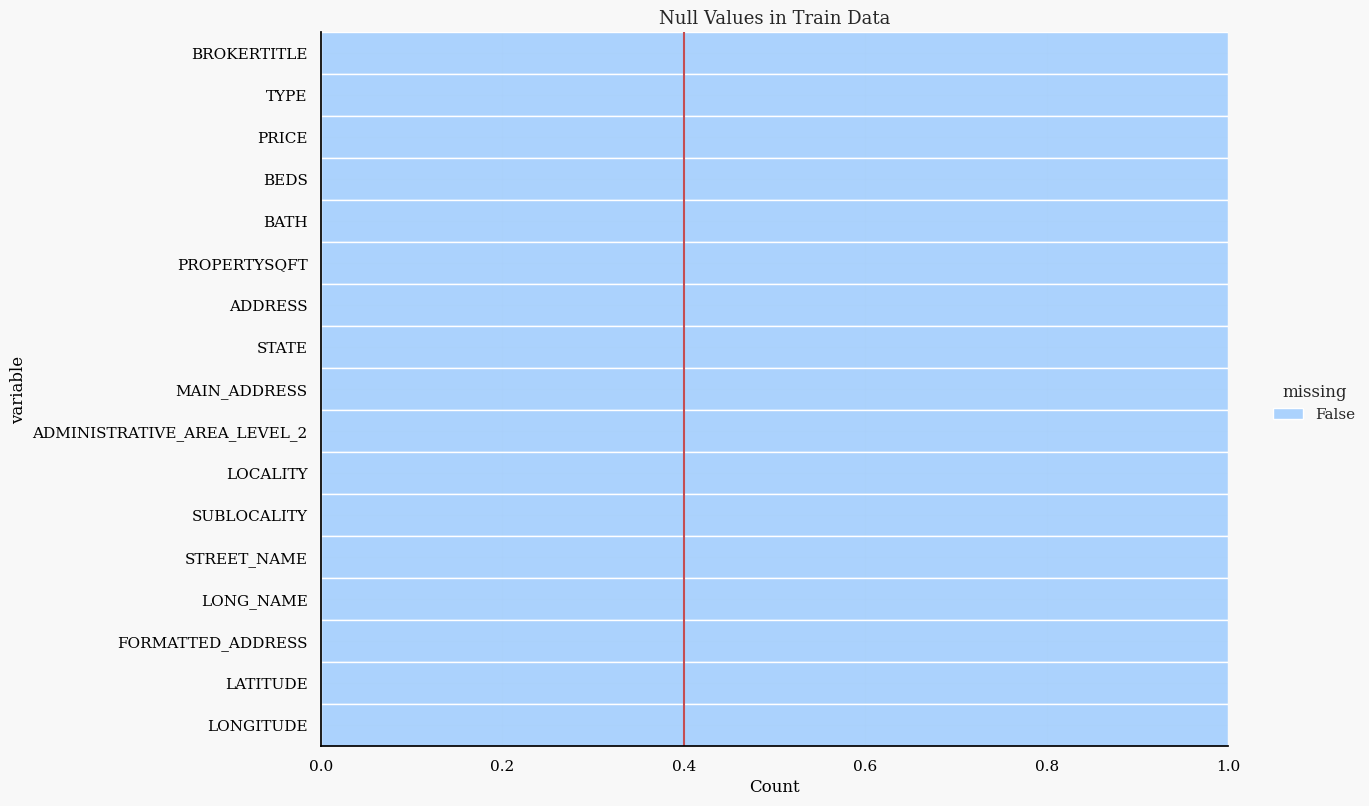

In [ ]:
sns.displot(data=df.isnull().melt(value_name='missing'),
    y='variable',
    hue='missing',
    multiple='fill',
    height=8,
#     width=10,
    aspect=1.6
)

# specifying a threshold value
plt.axvline(0.4, color='r')
plt.title('Null Values in Train Data', fontsize=13)
plt.show()

In [ ]:
data = df[['LONGITUDE', 'LATITUDE', 'PRICE', 'STREET_NAME']].copy()
data = data.sort_values(by=['PRICE'], ascending=False)
data  = data.head(500)

data.rename(columns = {'LONGITUDE':'lon', 'LATITUDE':'lat', 
                              'PRICE':'value', 'STREET_NAME':'name'}, inplace = True) 

m = folium.Map(location=[48, -102], tiles="OpenStreetMap", zoom_start=3)

for i in range(0,len(data)):
   folium.Marker(
      location=[data.iloc[i]['lat'], data.iloc[i]['lon']],
      popup=data.iloc[i]['value'],
   ).add_to(m)

map_title = "500 Most Costly Houses"
title_html = f'<h4 style="position:absolute;z-index:10000;left:40vw" ><b>{map_title}</b></h4>'
m.get_root().html.add_child(folium.Element(title_html))

sw = data[['lat', 'lon']].min().values.tolist()
ne = data[['lat', 'lon']].max().values.tolist()

m.fit_bounds([sw, ne])

m

In [ ]:
data = df[['LONGITUDE', 'LATITUDE', 'PRICE', 'STREET_NAME']].copy()
data = data.sort_values(by=['PRICE'], ascending=True)
data  = data.head(500)

data.rename(columns = {'LONGITUDE':'lon', 'LATITUDE':'lat', 
                              'PRICE':'value', 'STREET_NAME':'name'}, inplace = True) 

m = folium.Map(location=[48, -102], tiles="OpenStreetMap", zoom_start=3)

for i in range(0,len(data)):
   folium.Marker(
      location=[data.iloc[i]['lat'], data.iloc[i]['lon']],
      popup=data.iloc[i]['value'],
   ).add_to(m)

map_title = "500 Least Costly Houses"
title_html = f'<h4 style="position:absolute;z-index:10000;left:40vw" ><b>{map_title}</b></h4>'
m.get_root().html.add_child(folium.Element(title_html))

sw = data[['lat', 'lon']].min().values.tolist()
ne = data[['lat', 'lon']].max().values.tolist()

m.fit_bounds([sw, ne])

m

In [ ]:
df.describe()
df = df.drop(df[df['PRICE'] == 2147483647].index)
df = df.drop(df[df['PRICE'] == 195000000].index)

In [ ]:
df.head(5)

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856
5,Brokered by Sowae Corp,House for sale,690000,5,2.000000,4004.0,584 Park Pl,"Brooklyn, NY 11238","584 Park PlBrooklyn, NY 11238",United States,New York,Kings County,Brooklyn,Park Place,"584 Park Pl, Brooklyn, NY 11238, USA",40.674363,-73.958725


TYPE
Co-op for sale                1450
House for sale                1011
Condo for sale                 890
Multi-family home for sale     727
Townhouse for sale             299
Pending                        243
Contingent                      88
Land for sale                   49
For sale                        20
Foreclosure                     14
Condop for sale                  5
Coming Soon                      2
Mobile house for sale            1
Name: count, dtype: int64


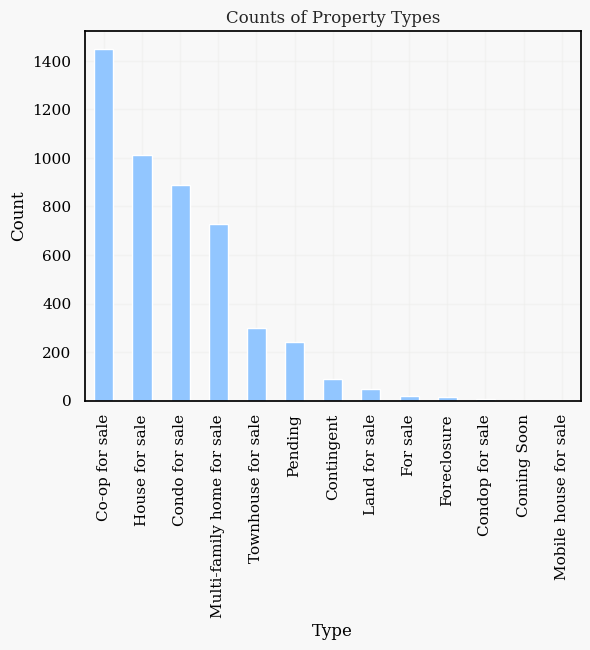

In [ ]:
property_counts = df['TYPE'].value_counts()
print(property_counts)
df['TYPE'].value_counts().plot(kind='bar')
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Counts of Property Types')
plt.show()



BEDS
3     1456
2      995
1      820
4      570
5      360
6      271
7      103
8       84
9       39
12      23
10      21
11      20
14       7
15       5
13       5
16       4
20       3
24       3
32       2
35       1
50       1
36       1
42       1
40       1
30       1
19       1
18       1
Name: count, dtype: int64


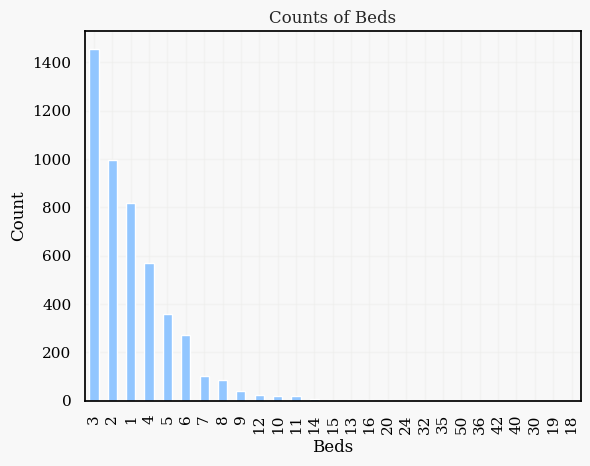

In [ ]:
bed_counts = df['BEDS'].value_counts()
print(bed_counts)
df['BEDS'].value_counts().plot(kind='bar')
plt.xlabel('Beds')
plt.ylabel('Count')
plt.title('Counts of Beds')
plt.show()

BATH
2     1973
1     1521
4      484
3      467
6      141
5      100
8       45
7       24
10      15
9        7
16       5
20       3
12       3
0        3
11       2
32       1
13       1
50       1
24       1
43       1
17       1
Name: count, dtype: int64


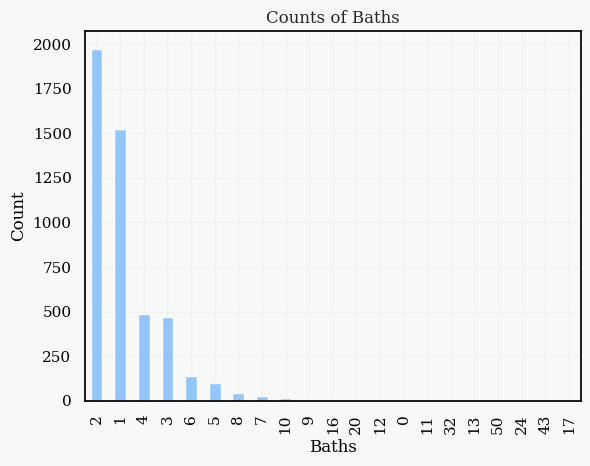

In [ ]:
df['BATH'] = df['BATH'].astype(int)
bath_counts = df['BATH'].value_counts()
print(bath_counts)
df['BATH'].value_counts().plot(kind='bar')
plt.xlabel('Baths')
plt.ylabel('Count')
plt.title('Counts of Baths')
plt.show()

LOCALITY
New York           2503
New York County     979
Queens County       557
Kings County        464
Bronx County        182
Richmond County      59
United States        37
Brooklyn              6
Queens                6
The Bronx             5
Flatbush              1
Name: count, dtype: int64


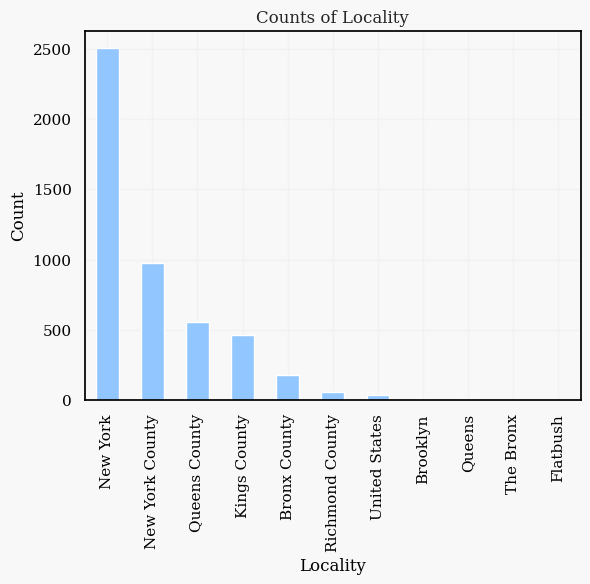

In [ ]:

bath_counts = df['LOCALITY'].value_counts()
print(bath_counts)
df['LOCALITY'].value_counts().plot(kind='bar')
plt.xlabel('Locality')
plt.ylabel('Count')
plt.title('Counts of Locality')
plt.show()

SUBLOCALITY
New York            1016
Kings County         727
Queens County        684
Queens               555
Richmond County      479
Brooklyn             464
Bronx County         307
New York County      285
The Bronx            184
Staten Island         59
Manhattan             21
Riverdale              4
Flushing               4
Coney Island           3
East Bronx             1
Brooklyn Heights       1
Jackson Heights        1
Rego Park              1
Fort Hamilton          1
Dumbo                  1
Snyder Avenue          1
Name: count, dtype: int64


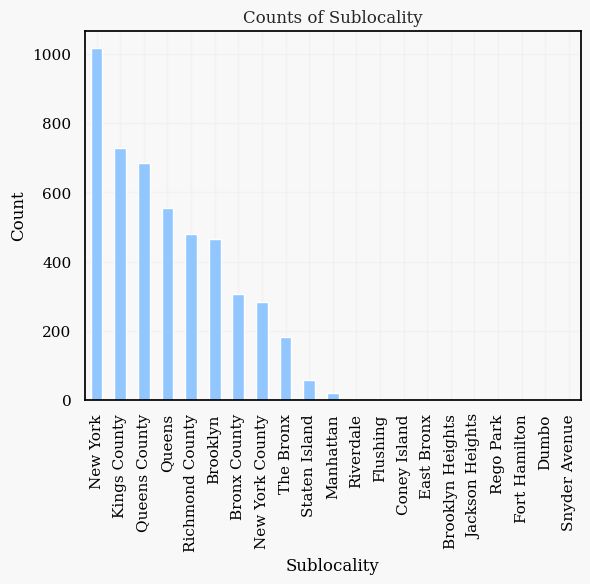

In [ ]:
bath_counts = df['SUBLOCALITY'].value_counts()
print(bath_counts)
df['SUBLOCALITY'].value_counts().plot(kind='bar')
plt.xlabel('Sublocality')
plt.ylabel('Count')
plt.title('Counts of Sublocality')
plt.show()

PROPERTYSQFT
2184.207862     1621
800.000000        57
750.000000        53
900.000000        53
1200.000000       50
                ... 
1682.000000        1
21000.000000       1
2652.000000        1
1562.000000        1
655.000000         1
Name: count, Length: 1444, dtype: int64


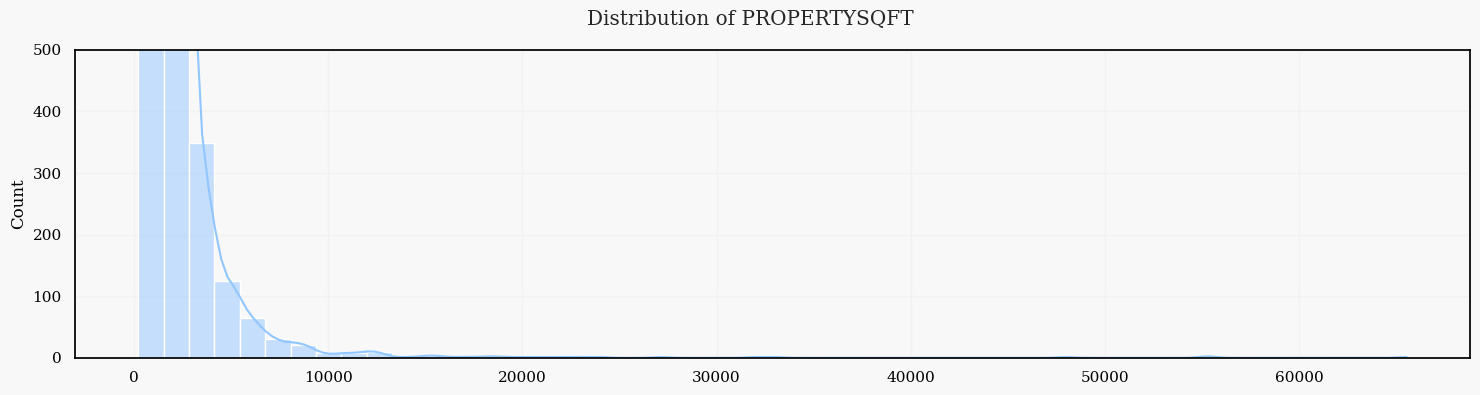

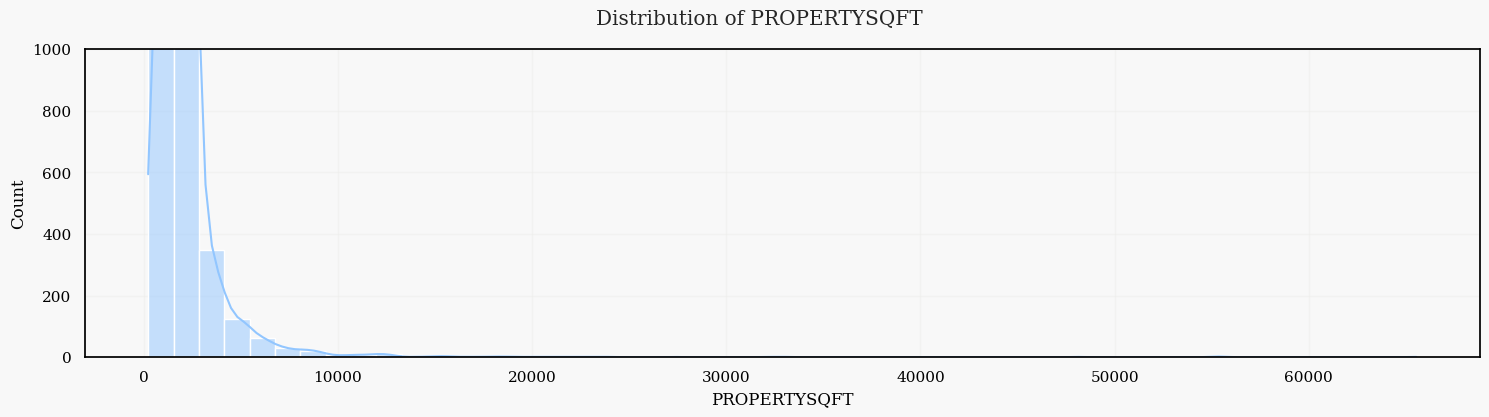

In [ ]:
bath_counts = df['PROPERTYSQFT'].value_counts()
print(bath_counts)

fig, ax = plt.subplots(figsize=(18, 4))
fig = sns.histplot(data=df, x='PROPERTYSQFT', bins=50, kde=True)
plt.ylim(0,500)
plt.ticklabel_format(style = 'plain')
fig.set(xlabel='')
plt.suptitle('Distribution of PROPERTYSQFT')
plt.show()

fig, ax = plt.subplots(figsize=(18, 4))
fig = sns.histplot(data=df, x='PROPERTYSQFT', bins=50, kde=True)
plt.ylim(0,1000)
plt.ticklabel_format(style = 'plain')
plt.suptitle('Distribution of PROPERTYSQFT')
plt.show()

PRICE
699000     53
799000     48
599000     47
1250000    42
499000     42
           ..
2999990     1
449999      1
886545      1
110000      1
598125      1
Name: count, Length: 1272, dtype: int64


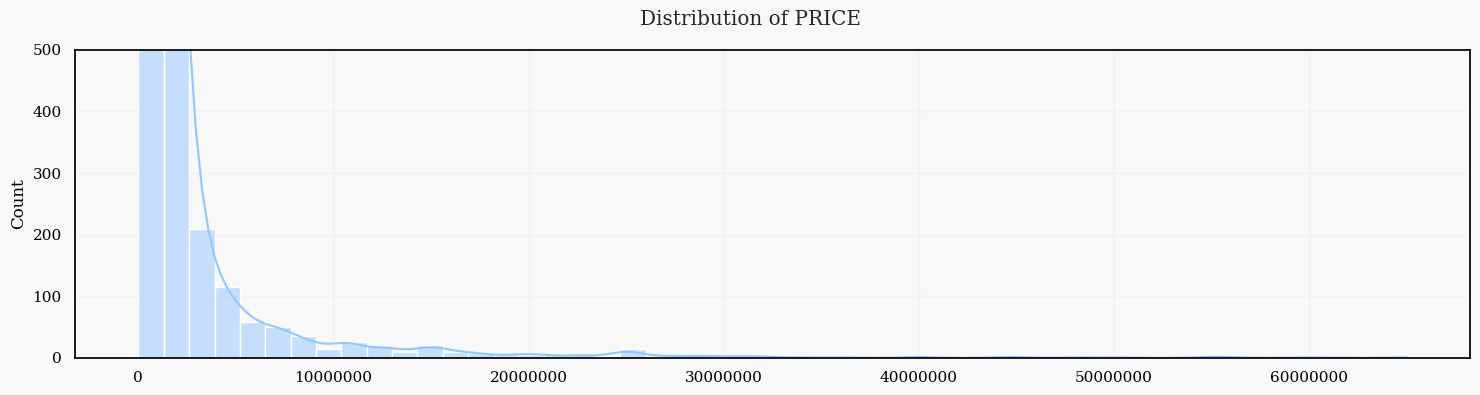

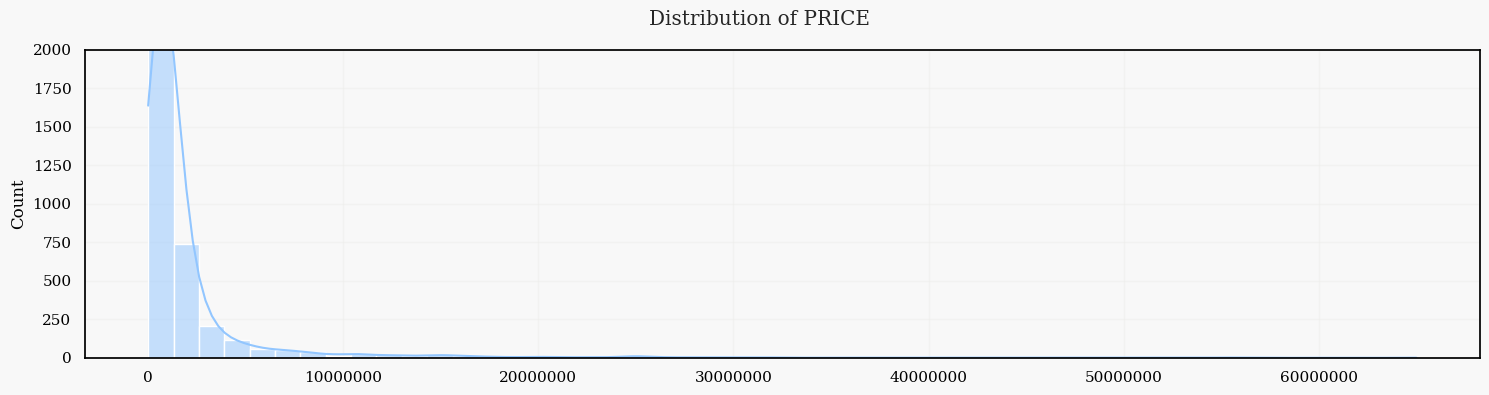

In [ ]:
bath_counts = df['PRICE'].value_counts()
print(bath_counts)

fig, ax = plt.subplots(figsize=(18, 4))
fig = sns.histplot(data=df, x='PRICE', bins=50, kde=True)
plt.ylim(0,500)
plt.ticklabel_format(style = 'plain')
fig.set(xlabel='')
plt.suptitle('Distribution of PRICE')
plt.show()

fig, ax = plt.subplots(figsize=(18, 4))
fig = sns.histplot(data=df, x='PRICE', bins=50, kde=True)
plt.ylim(0,2000)
plt.ticklabel_format(style = 'plain')
fig.set(xlabel='')
plt.suptitle('Distribution of PRICE')
plt.show()

In [ ]:
le = LabelEncoder()
df.LOCALITY = le.fit_transform(df.LOCALITY)
df.SUBLOCALITY = le.fit_transform(df.SUBLOCALITY)
df.TYPE = le.fit_transform(df.TYPE)

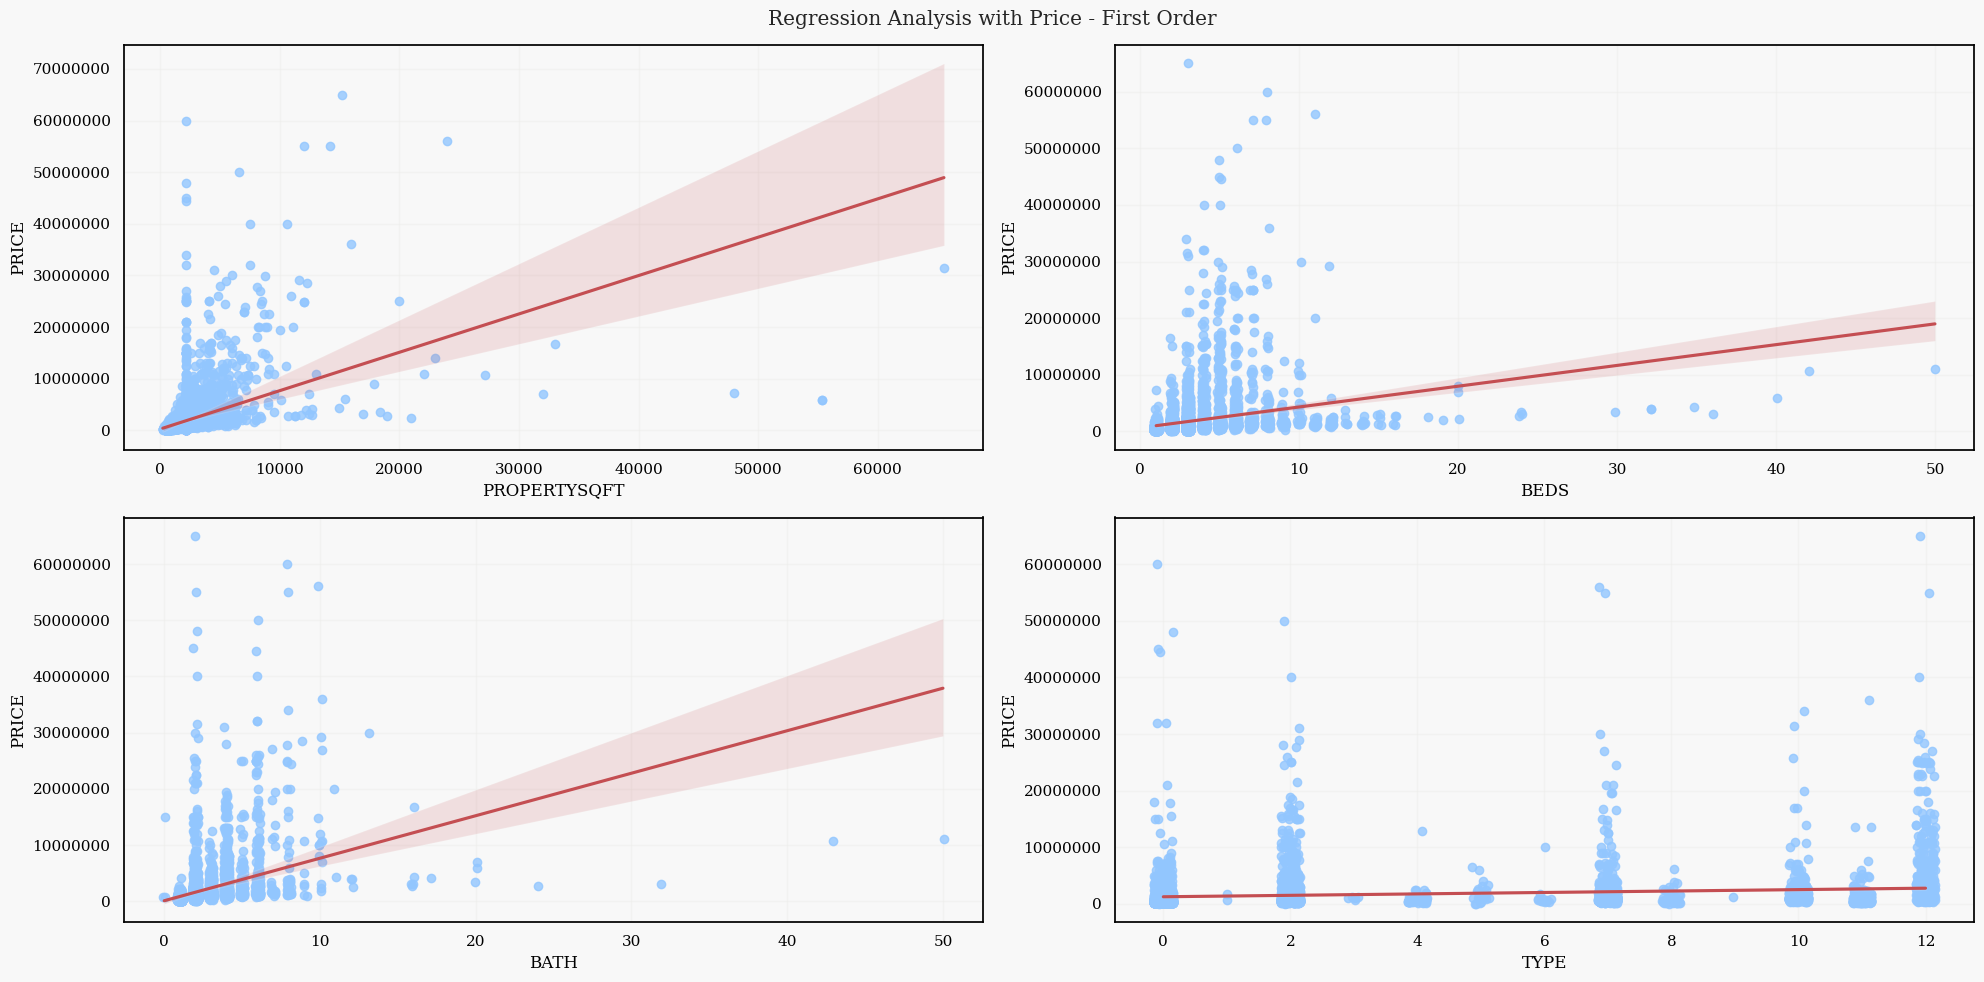

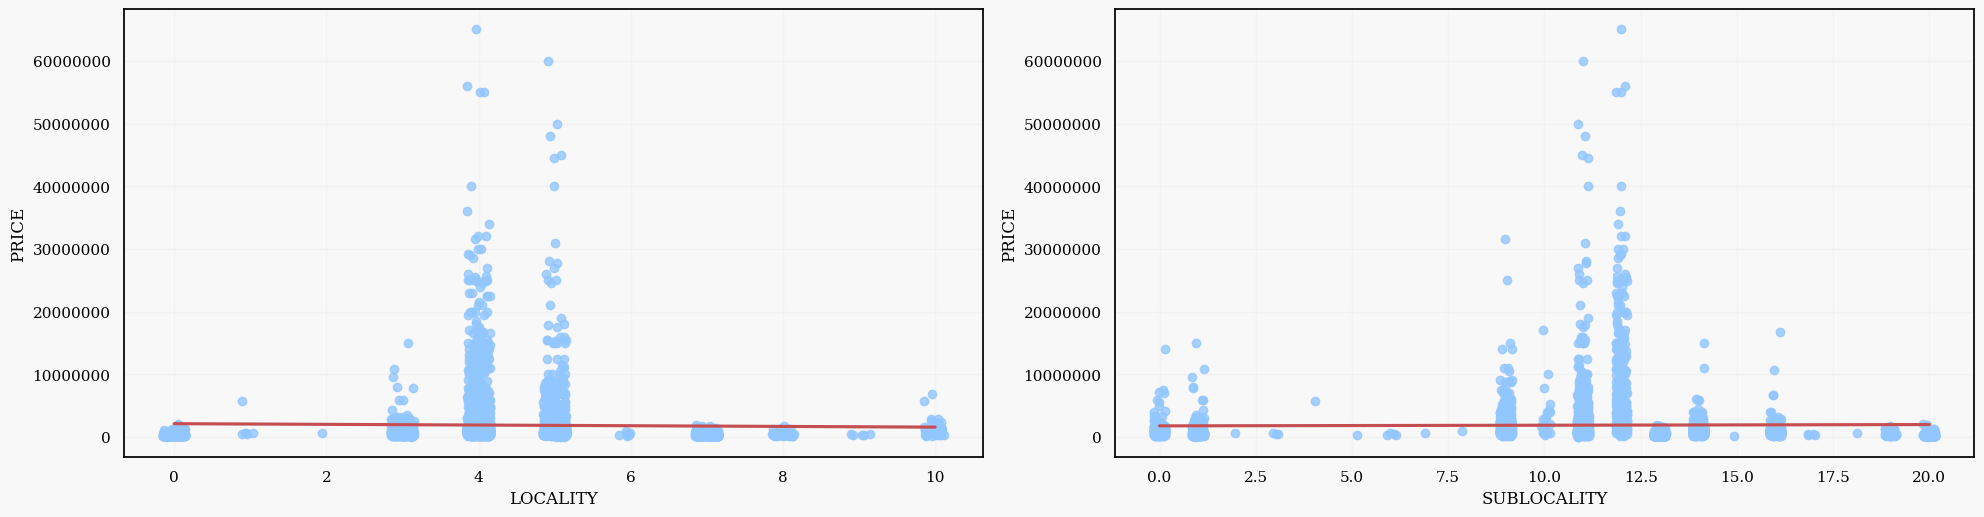

In [ ]:
fig = plt.figure(figsize=(20, 10))

fig1 = fig.add_subplot(221); sns.regplot(data=df, x="PROPERTYSQFT", y="PRICE", x_jitter=.15, line_kws=dict(color="r"),)
plt.ticklabel_format(style = 'plain')

fig2 = fig.add_subplot(222); sns.regplot(data=df, x="BEDS", y="PRICE", x_jitter=.15, line_kws=dict(color="r"),)
plt.ticklabel_format(style = 'plain')

fig3 = fig.add_subplot(223); sns.regplot(data=df, x="BATH", y="PRICE", x_jitter=.15, line_kws=dict(color="r"),)
plt.ticklabel_format(style = 'plain')

fig4 = fig.add_subplot(224); sns.regplot(data=df, x='TYPE', y="PRICE", x_jitter=.15, line_kws=dict(color="r"),)
plt.ticklabel_format(style = 'plain')

plt.suptitle('Regression Analysis with Price - First Order')
plt.tight_layout()
plt.show()

# -----------

fig = plt.figure(figsize=(20, 10))

fig1 = fig.add_subplot(221); sns.regplot(data=df, x="LOCALITY", y="PRICE", x_jitter=.15, line_kws=dict(color="r"),)
plt.ticklabel_format(style = 'plain')

fig2 = fig.add_subplot(222); sns.regplot(data=df, x="SUBLOCALITY", y="PRICE", x_jitter=.15, line_kws=dict(color="r"),)
plt.ticklabel_format(style = 'plain')

plt.tight_layout()
plt.show()

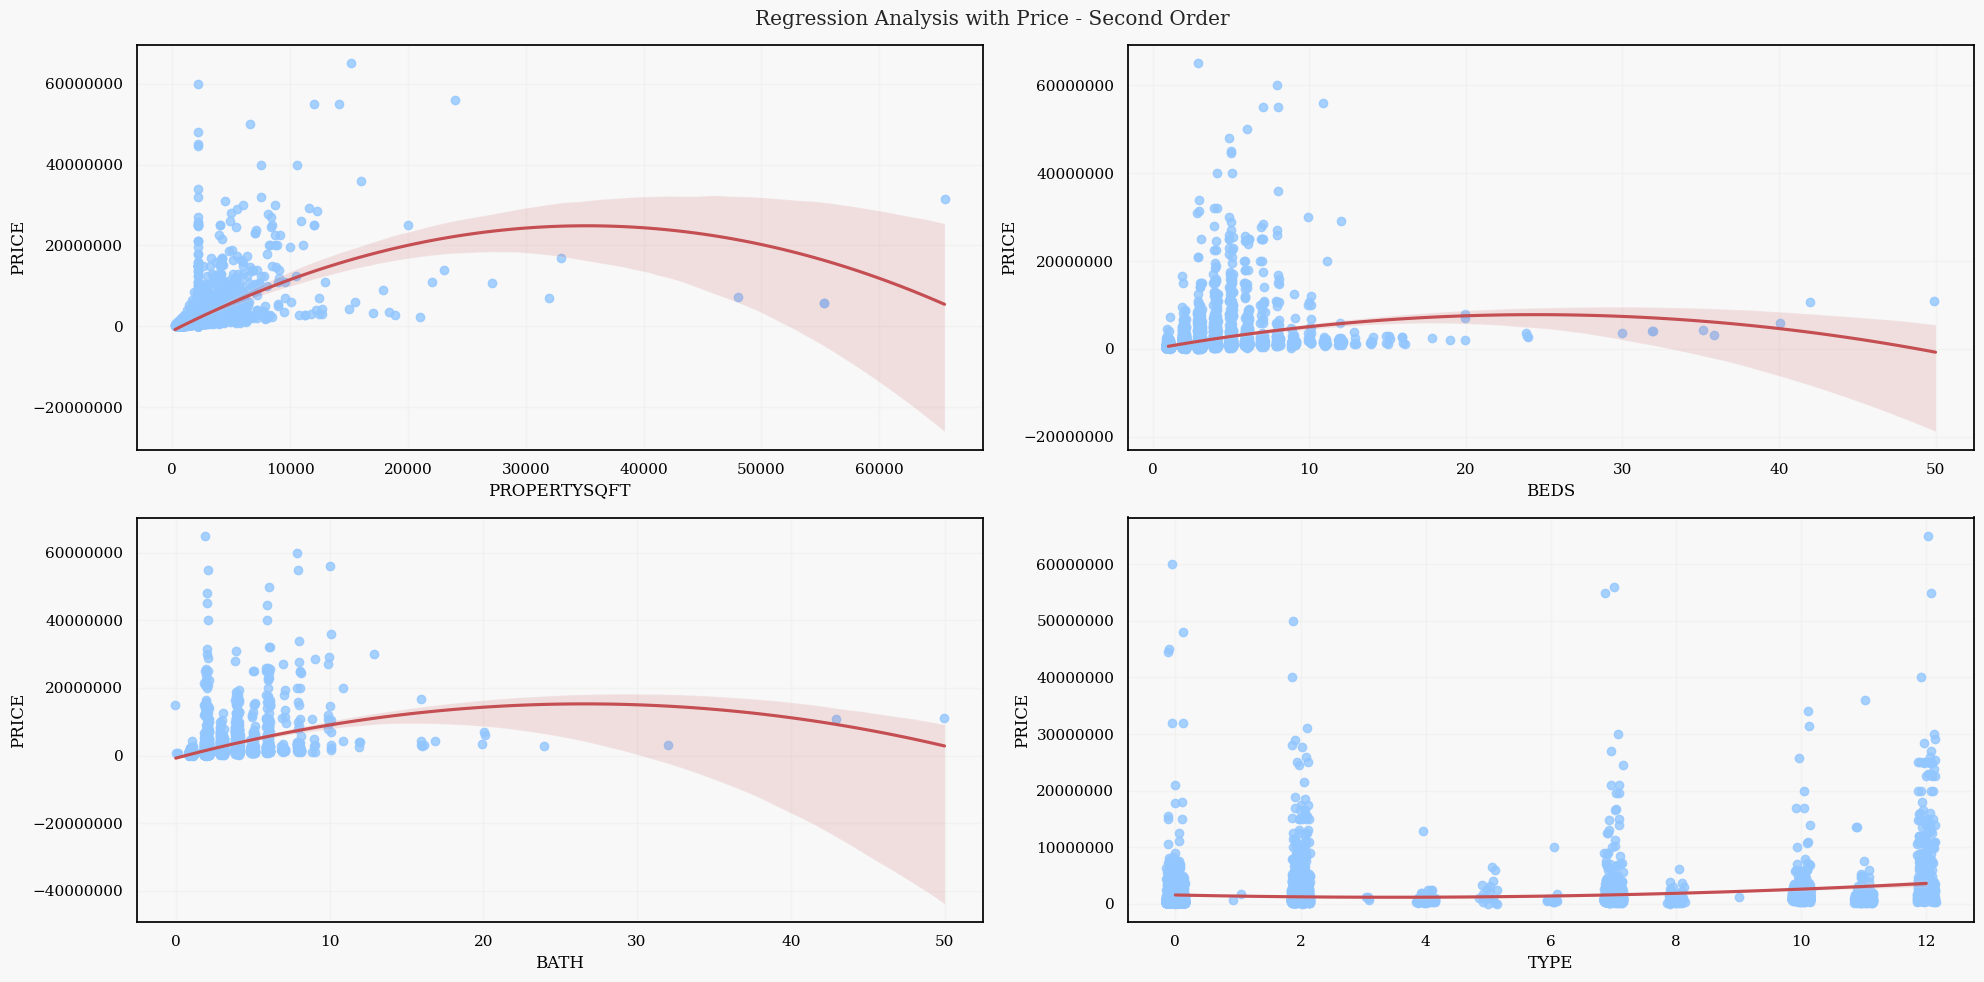

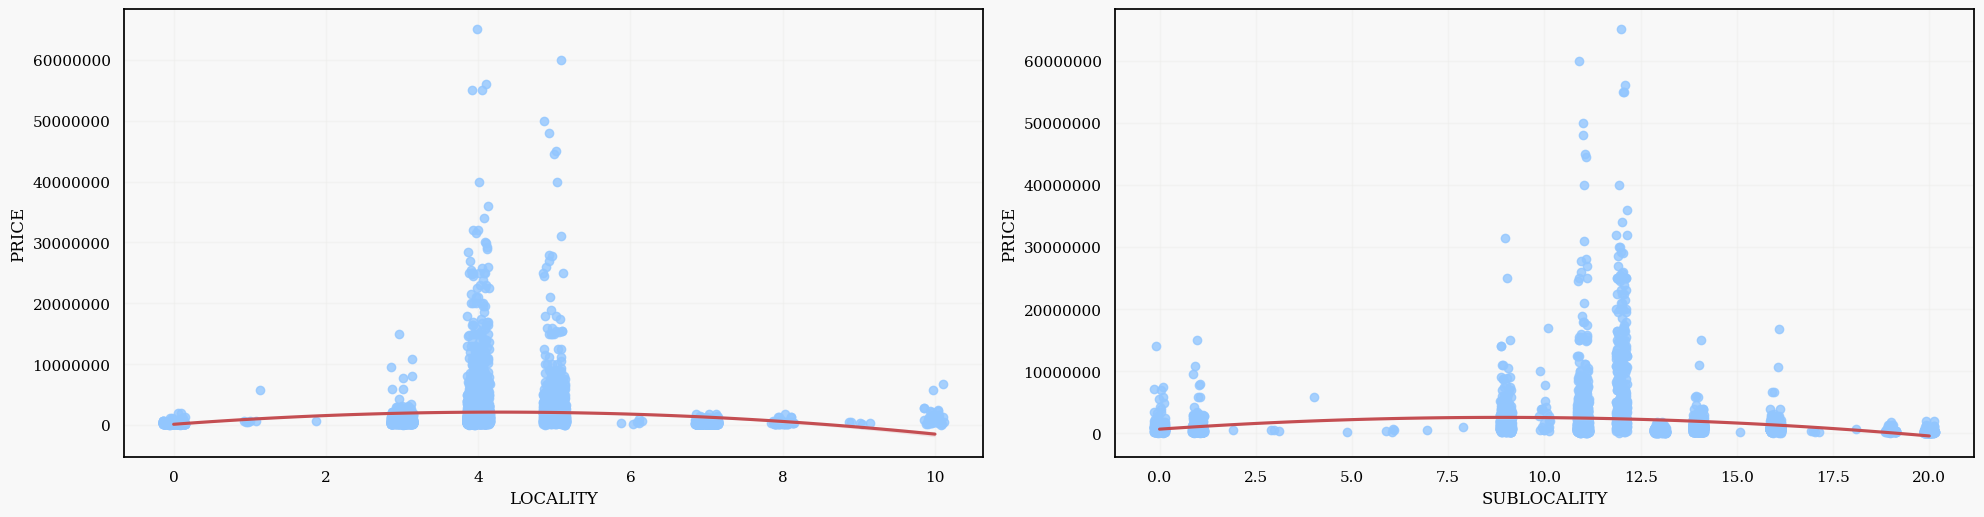

In [ ]:
fig = plt.figure(figsize=(20, 10))

fig1 = fig.add_subplot(221); sns.regplot(data=df, x="PROPERTYSQFT", y="PRICE", order=2 ,x_jitter=.15, line_kws=dict(color="r"),)
plt.ticklabel_format(style = 'plain')

fig2 = fig.add_subplot(222); sns.regplot(data=df, x="BEDS", y="PRICE", order=2, x_jitter=.15, line_kws=dict(color="r"),)
plt.ticklabel_format(style = 'plain')

fig3 = fig.add_subplot(223); sns.regplot(data=df, x="BATH", y="PRICE", order=2, x_jitter=.15, line_kws=dict(color="r"),)
plt.ticklabel_format(style = 'plain')

fig4 = fig.add_subplot(224); sns.regplot(data=df, x="TYPE", y="PRICE", order=2, x_jitter=.15, line_kws=dict(color="r"),)
plt.ticklabel_format(style = 'plain')

plt.suptitle('Regression Analysis with Price - Second Order')
plt.tight_layout()
plt.show()

# -----------

fig = plt.figure(figsize=(20, 10))

fig1 = fig.add_subplot(221); sns.regplot(data=df, x="LOCALITY", y="PRICE", order=2, x_jitter=.15, line_kws=dict(color="r"),)
plt.ticklabel_format(style = 'plain')

fig2 = fig.add_subplot(222); sns.regplot(data=df, x="SUBLOCALITY", y="PRICE", order=2, x_jitter=.15, line_kws=dict(color="r"),)
plt.ticklabel_format(style = 'plain')

plt.tight_layout()
plt.show()

/Users/jakebrulato/Documents/GitHub/Advanced_BA/.venv/lib/python3.10/site-packages/seaborn/regression.py:315: RuntimeWarning: divide by zero encountered in log
  grid = np.c_[np.ones(len(grid)), np.log(grid)]
/Users/jakebrulato/Documents/GitHub/Advanced_BA/.venv/lib/python3.10/site-packages/seaborn/regression.py:318: RuntimeWarning: divide by zero encountered in log
  _x = np.c_[_x[:, 0], np.log(_x[:, 1])]
/Users/jakebrulato/Documents/GitHub/Advanced_BA/.venv/lib/python3.10/site-packages/numpy/lib/function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/Users/jakebrulato/Documents/GitHub/Advanced_BA/.venv/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,


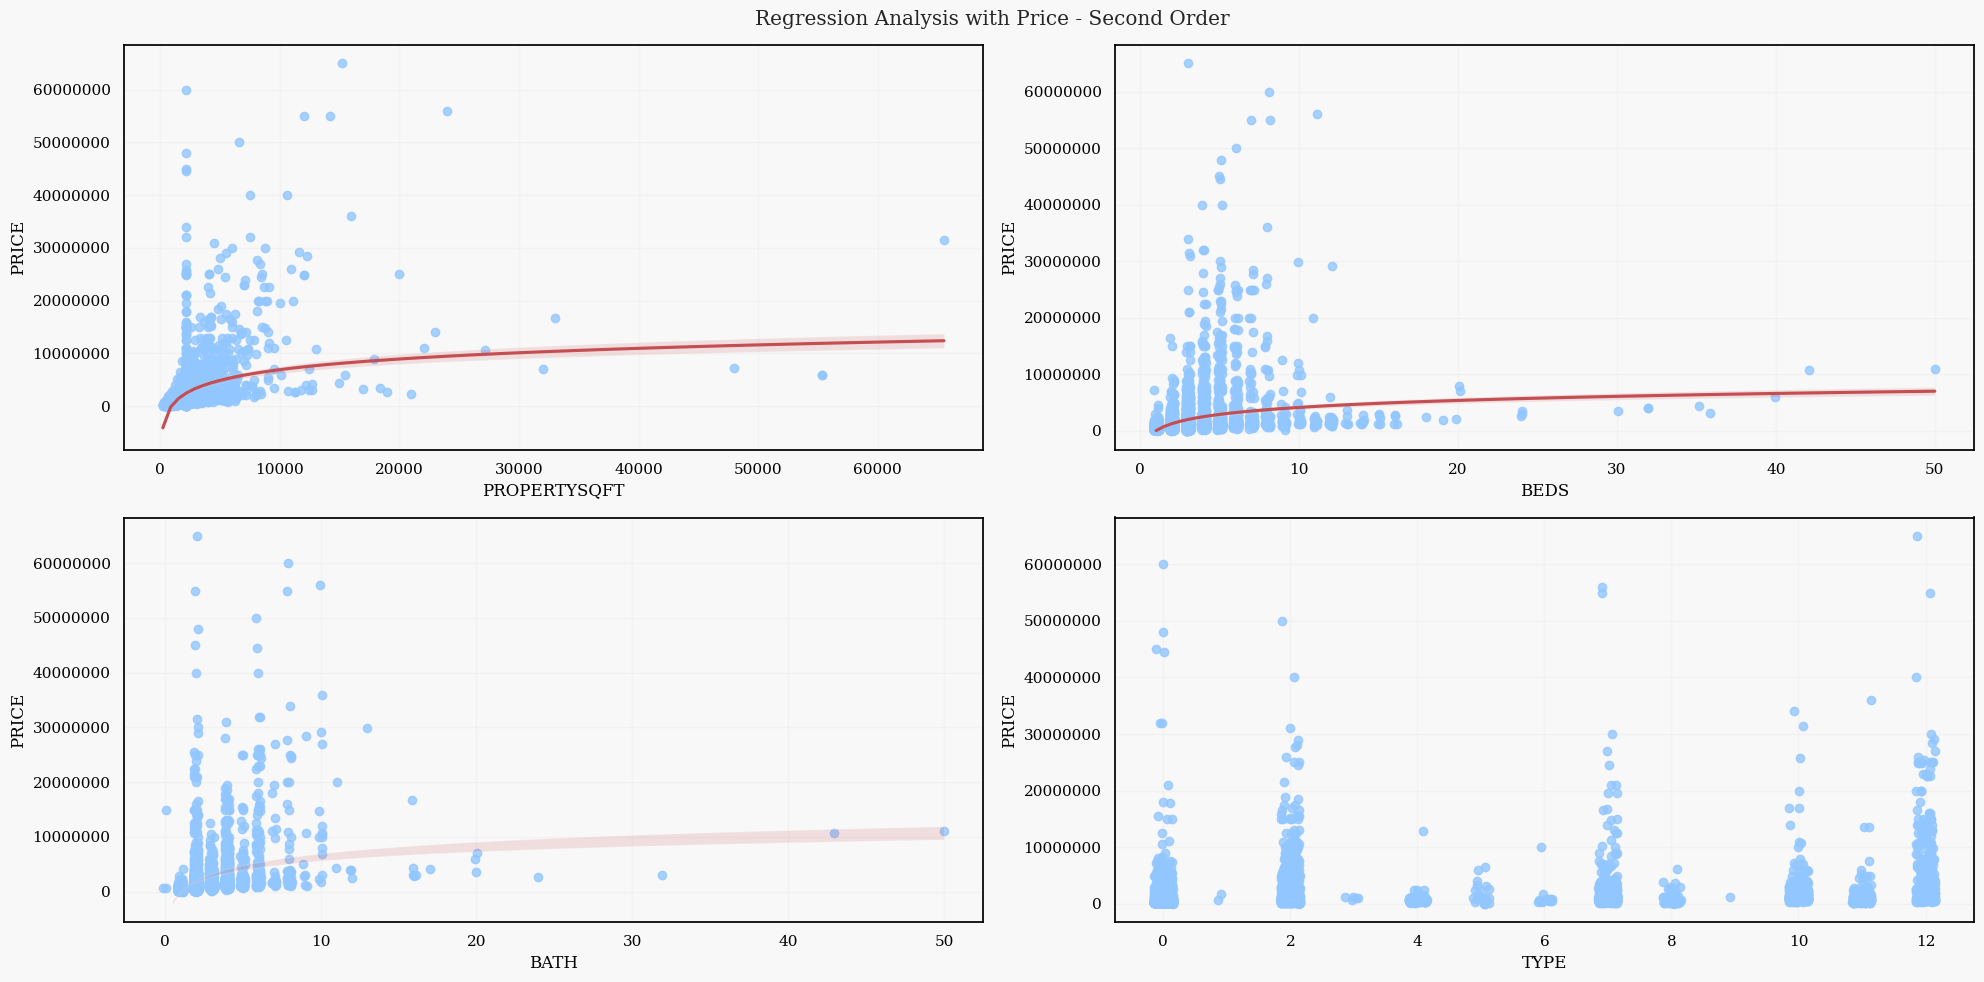

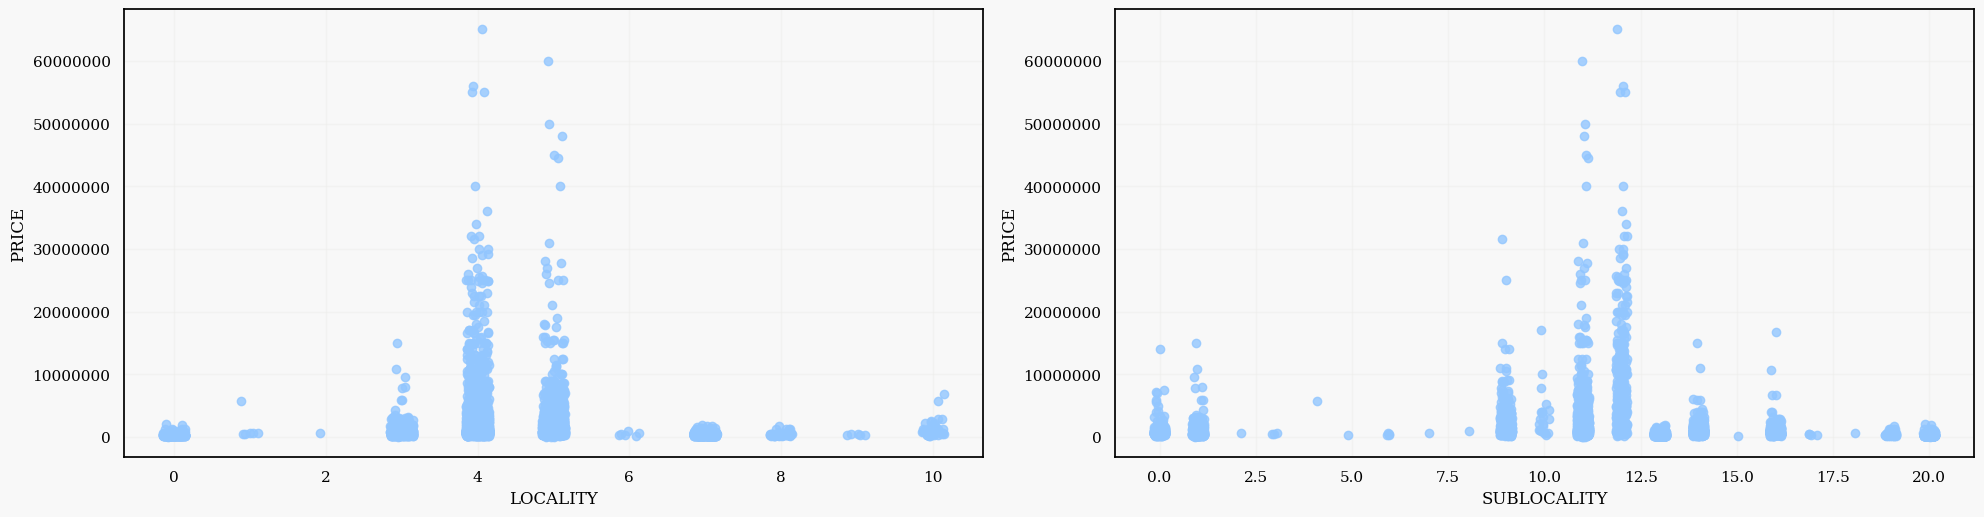

In [ ]:
fig = plt.figure(figsize=(20, 10))

fig1 = fig.add_subplot(221); sns.regplot(data=df, x="PROPERTYSQFT", y="PRICE", logx=True,x_jitter=.15, line_kws=dict(color="r"),)
plt.ticklabel_format(style = 'plain')

fig2 = fig.add_subplot(222); sns.regplot(data=df, x="BEDS", y="PRICE", logx=True, x_jitter=.15, line_kws=dict(color="r"),)
plt.ticklabel_format(style = 'plain')

fig3 = fig.add_subplot(223); sns.regplot(data=df, x="BATH", y="PRICE", logx=True, x_jitter=.15, line_kws=dict(color="r"),)
plt.ticklabel_format(style = 'plain')

fig4 = fig.add_subplot(224); sns.regplot(data=df, x="TYPE", y="PRICE", logx=True, x_jitter=.15, line_kws=dict(color="r"),)
plt.ticklabel_format(style = 'plain')

plt.suptitle('Regression Analysis with Price - Second Order')
plt.tight_layout()
plt.show()

# -----------

fig = plt.figure(figsize=(20, 10))

fig1 = fig.add_subplot(221); sns.regplot(data=df, x="LOCALITY", y="PRICE", logx=True, x_jitter=.15, line_kws=dict(color="r"),)
plt.ticklabel_format(style = 'plain')

fig2 = fig.add_subplot(222); sns.regplot(data=df, x="SUBLOCALITY", y="PRICE", logx=True, x_jitter=.15, line_kws=dict(color="r"),)
plt.ticklabel_format(style = 'plain')

plt.tight_layout()
plt.show()

In [ ]:
df = df.drop(['TYPE', 'LOCALITY', 'SUBLOCALITY'], axis=1)
df.head()

,BROKERTITLE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,315000,2,2,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
2,Brokered by Sowae Corp,260000,4,2,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,69000,3,1,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,55000000,7,2,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856
5,Brokered by Sowae Corp,690000,5,2,4004.0,584 Park Pl,"Brooklyn, NY 11238","584 Park PlBrooklyn, NY 11238",United States,Brooklyn,Park Place,"584 Park Pl, Brooklyn, NY 11238, USA",40.674363,-73.958725


In [ ]:
df['BATH'] = df['BATH'].astype(int)
X = df[['BEDS', 'BATH', 'PROPERTYSQFT']]
y = df['PRICE']

In [ ]:
X_encoded = pd.get_dummies(X, columns=['BATH',
                                       'BEDS'])

X_encoded.head()

,PROPERTYSQFT,BATH_0,BATH_1,BATH_2,BATH_3,BATH_4,BATH_5,BATH_6,BATH_7,BATH_8,BATH_9,BATH_10,BATH_11,BATH_12,BATH_13,BATH_16,BATH_17,BATH_20,BATH_24,BATH_32,BATH_43,BATH_50,BEDS_1,BEDS_2,BEDS_3,BEDS_4,BEDS_5,BEDS_6,BEDS_7,BEDS_8,BEDS_9,BEDS_10,BEDS_11,BEDS_12,BEDS_13,BEDS_14,BEDS_15,BEDS_16,BEDS_18,BEDS_19,BEDS_20,BEDS_24,BEDS_30,BEDS_32,BEDS_35,BEDS_36,BEDS_40,BEDS_42,BEDS_50
0,1400.0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,2015.0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,445.0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,14175.0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,4004.0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, 
                                                    y,
                                                    random_state=42,)

clf_xgb_v1 = xgb.XGBRegressor(objective="reg:squarederror",
                            # missing=None,
                            seed=42)

clf_xgb_v1.fit(X_train,
            y_train,
            verbose=True,
            early_stopping_rounds=20,
            eval_metric='rmse',
            eval_set=[(X_test, y_test)])

[0]	validation_0-rmse:4308803.98271
[1]	validation_0-rmse:4117452.82993
[2]	validation_0-rmse:4016694.72973
[3]	validation_0-rmse:3977764.70407
[4]	validation_0-rmse:3961537.90078
[5]	validation_0-rmse:3936151.53112
[6]	validation_0-rmse:3935858.99134
[7]	validation_0-rmse:3960149.56857
[8]	validation_0-rmse:3938353.71544
[9]	validation_0-rmse:3959488.98728
[10]	validation_0-rmse:3944479.03832
[11]	validation_0-rmse:3940001.79616
[12]	validation_0-rmse:3941227.51615
[13]	validation_0-rmse:3944429.46024
[14]	validation_0-rmse:3943994.64751
[15]	validation_0-rmse:3956731.40666
[16]	validation_0-rmse:3959241.02336
[17]	validation_0-rmse:3956407.01218
[18]	validation_0-rmse:3957610.76578
[19]	validation_0-rmse:3956073.77839
[20]	validation_0-rmse:3958663.69495
[21]	validation_0-rmse:3957856.88878


/Users/jakebrulato/Documents/GitHub/Advanced_BA/.venv/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/jakebrulato/Documents/GitHub/Advanced_BA/.venv/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:3957772.59118
[23]	validation_0-rmse:3957996.63114
[24]	validation_0-rmse:3955027.17093
[25]	validation_0-rmse:3954910.18740


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_preds = clf_xgb_v1.predict(X_test)

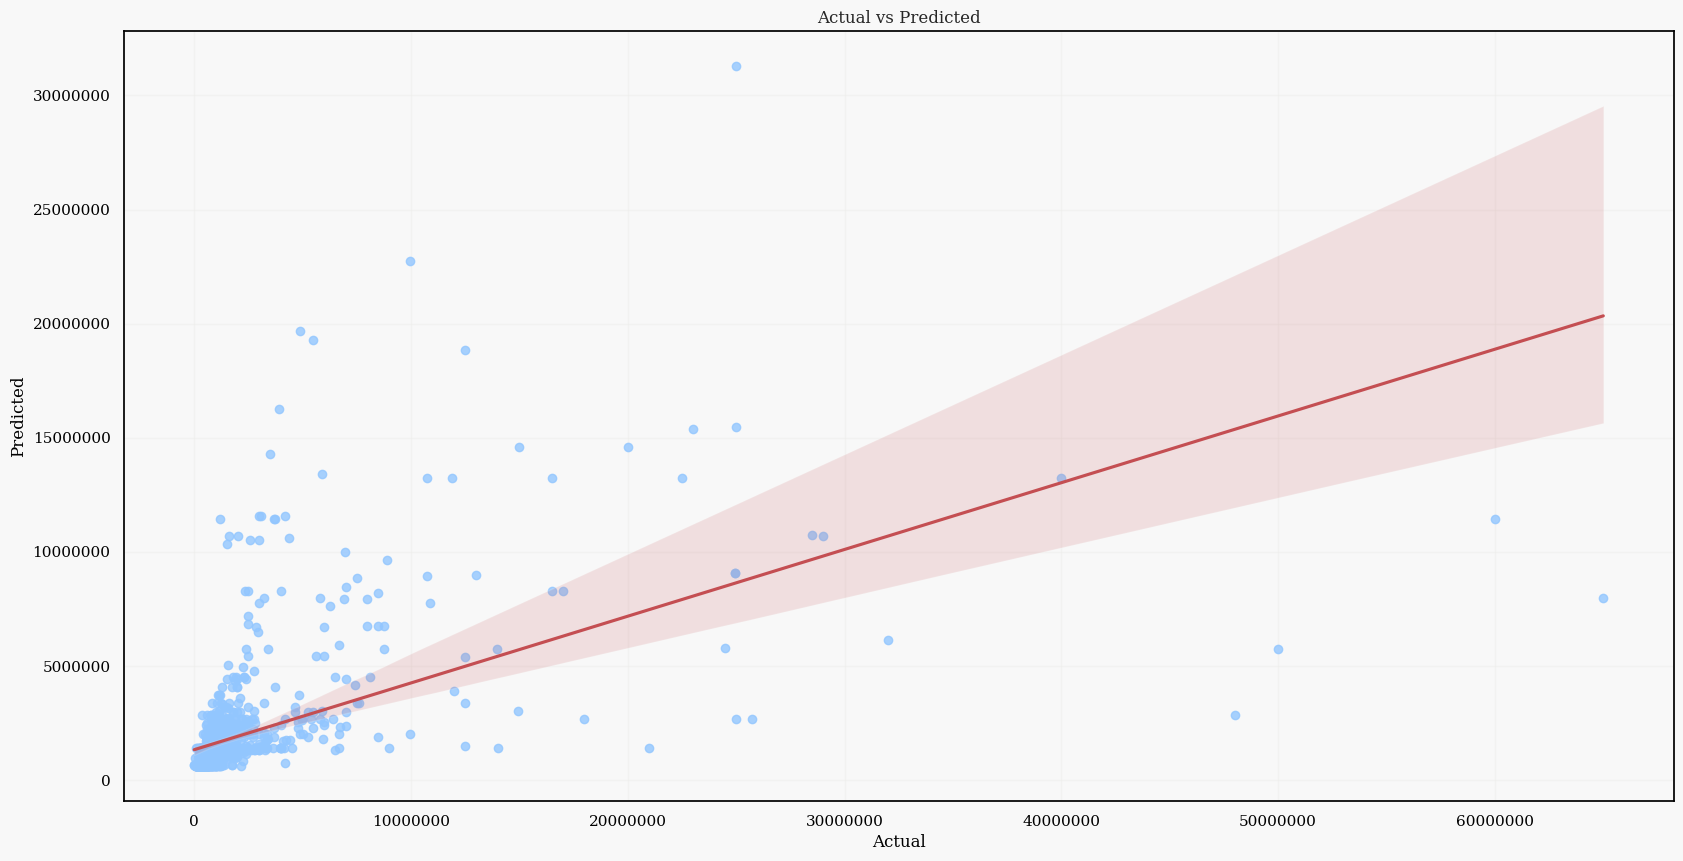

In [ ]:
fig = plt.figure(figsize=(20, 10))
sns.regplot(data=df, x=y_test, y=y_preds, x_jitter=.15, line_kws=dict(color="r"),)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.ticklabel_format(style = 'plain')